# Matplotlib

Matplotlib - это библиотека визуализации данных. Функционал библиотеки во многом схож с функциями визуализации языка MATLAB. [Официальный сайт](https://matplotlib.org) обладает огромным количеством примеров, поэтому рекомендуется в одну из первых очередей поиска решений обращаться к нему.

Установка как обычно проста:

In [ ]:
!pip install matplotlib==3.3.1


Как всегда, начало работы производим с импорта необходимого модуля:

In [1]:
import matplotlib as mpl

Начнем с возможностей настройки графиков. Модуль `matplotlib` имеет словарь `rcParams`, в котором можно настроить различные параметры отображения. Эти значения являются параметрами по-умолчанию, если не заданы при отображении.

In [4]:
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

# Размер отображаемой фигуры в дюймах
mpl.rcParams['figure.figsize'] = (10, 6)
# Цвет всего текста
mpl.rcParams['text.color'] = 'black'
# Размер шрифта
mpl.rcParams['font.size'] = 14
# Цвет текста подписи осей
mpl.rcParams['axes.labelcolor'] = TEXT_COLOR
# Цвет текста меток по оси X
mpl.rcParams['xtick.color'] = TEXT_COLOR
# Цвет текста меток по оси Y
mpl.rcParams['ytick.color'] = TEXT_COLOR

Вся библиотека имеет очень широкий функционал, при этом интересующие нас функции находятся в сабмодуле `matplotlib.pyplot`:

In [2]:
from matplotlib import pyplot as plt
# Или равнозначный импорт
#   import matplotlib.pyplot as plt

## Hello World в визуализации

Начнем с простого кода отображения графика с дополнительными функциями "украшения" графика.

> Один из главных плюсов Jupyter является его возможность визуализации графиков без дополнительных настроек.

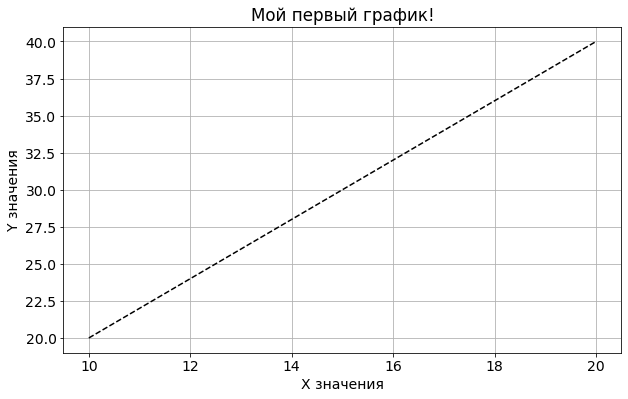

In [5]:
import numpy as np

# Создадим данные для отображения (50 точек)
x = np.linspace(10, 20, 50)
y = x*2

# Отображение точек в виде линии
plt.plot(x, y, 'k--')
# Добавим подписи для осей
plt.xlabel('X значения')
plt.ylabel('Y значения')
# Подпись графика
plt.title('Мой первый график!', color=TEXT_COLOR)
# Включение сетки
plt.grid(True)
# Отобразить график
plt.show()

Таким нехитрым способом можно отобразить график по точкам координат $x$ и $y$. Обратите внимание, что после передачи массивов координат задается описание вида `k--`. Таким образом задаются две вещи:
- `k` - цвет линии;
- `--` - формат линии.

> Для знакомства с тем, как еще можно управлять параметрами линии, обратитесь к [руководству на официальном сайте](https://matplotlib.org/tutorials/introductory/pyplot.html#controlling-line-properties).

Для отображения нескольких графиков можно воспользоваться несколькими вызовами `plt.plot()`:

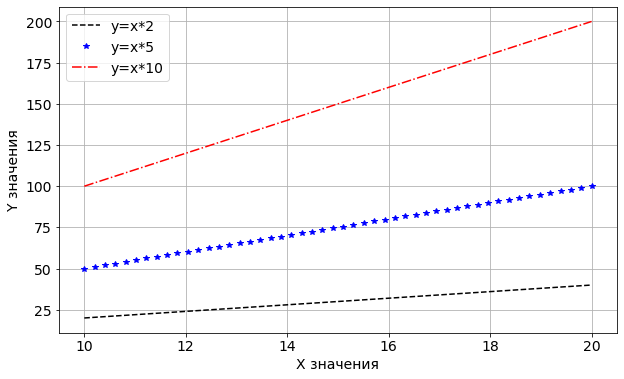

In [ ]:
x = np.linspace(10, 20, 50)

plt.plot(x, x*2, 'k--', label='y=x*2')
# Операция ** - возведение в степень
plt.plot(x, x*5, 'b*', label='y=x*5')
plt.plot(x, x*10, 'r-.', label='y=x*10')
plt.xlabel('X значения')
plt.ylabel('Y значения')
plt.grid(True)
# Отображение легенды
plt.legend()
plt.show()

При отображении нескольких графиков важно различать, какой за что отвечает, так что полезно отобразить легенду с помощью `plt.legend()`. Для присвоения каждому графику своей надписи при отображении используется аргумент `label`.

> Для знакомства с составными частями графика загляните в https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure

### Задание

Отобразите зависимости косинуса и синуса на одном графике. Воспользуйтесь шаблонами формата линии:
- треугольники `^`;
- квадраты `s`.

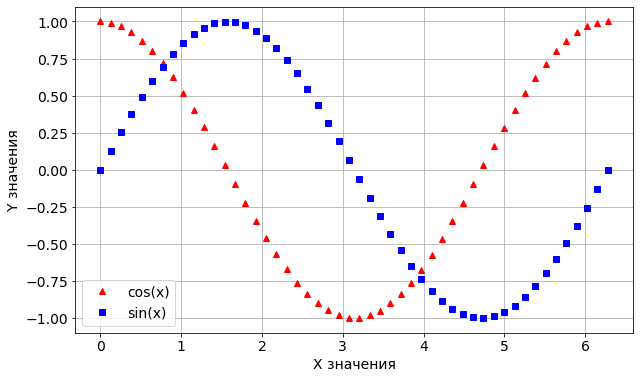

In [ ]:
# TODO
x = np.linspace(0, 6.28, 50)

plt.plot(x, np.cos(x), 'r^', label='cos(x)')
plt.plot(x, np.sin(x), 'bs', label='sin(x)')
plt.xlabel('X значения')
plt.ylabel('Y значения')
plt.grid(True)
# Отображение легенды
plt.legend()
plt.show()

### Задание

Отобразите сгенерированные данные в виде точек с помощью функции `plt.scatter()`:

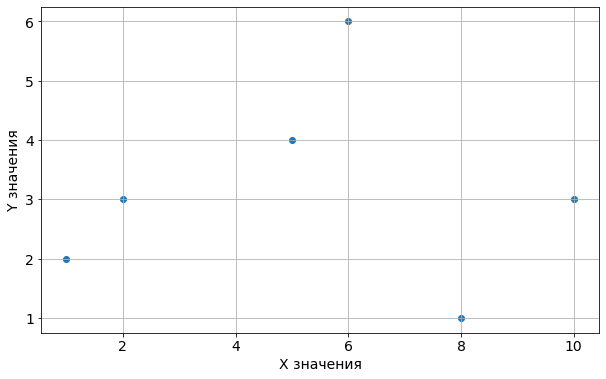

In [ ]:
x = np.array([1, 2, 5, 8, 6, 10])
y = np.array([2, 3, 4, 1, 6, 3])

# TODO
plt.scatter(x, y)
plt.xlabel('X значения')
plt.ylabel('Y значения')
plt.grid(True)
plt.show()

## Отображение по имени

Отображение данных может быть не только путем передачи самих массивов, но и набора данных, представленных в виде словаря, где каждая запись под ключем - конкретные данные. Так, можно создавать хранилища данных и затем отображать конкретные графики путем передачи имен:

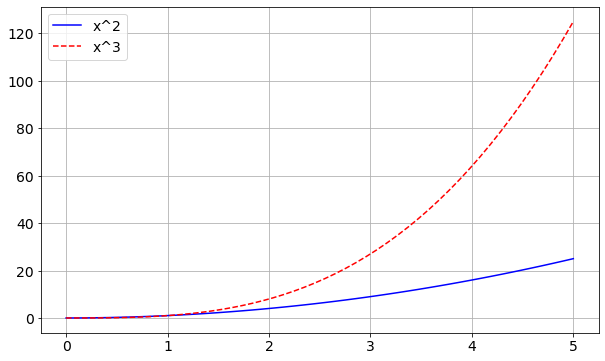

In [ ]:
data = {'x': np.linspace(0, 5, 50)}
data['x^2'] = data['x']**2
data['x^3'] = data['x']**3

plt.plot('x', 'x^2', 'b-', data=data, label='x^2')
plt.plot('x', 'x^3', 'r--', data=data, label='x^3')
plt.grid(True)
plt.legend()
plt.show()

> Может сейчас польза не явно видна, но это будет точно полезно при работе с табличными данными.

## Отображение категорий

В работе с данными часто бывает необходимость отображения статистики по отношению к каким-то классам или группам, которые представлены строчными значениями. Данные также передаются и `pyplot` сам настраивает ось абсцисс. 

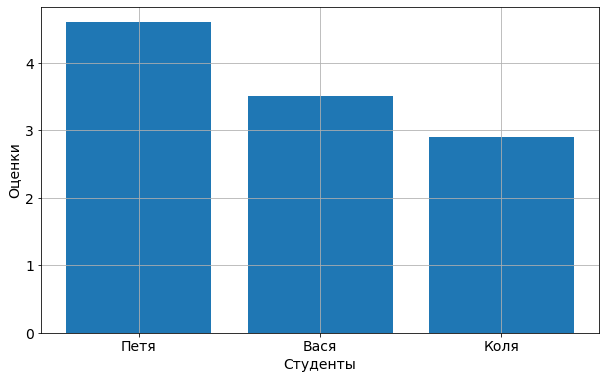

In [ ]:
names = ['Петя', 'Вася', 'Коля']
rates = [4.6, 3.5, 2.9]

plt.bar(names, rates)
plt.xlabel('Студенты')
plt.ylabel('Оценки')
plt.grid()
plt.show()

## Разделение зон отображения

Отображение нескольких графиков не всегда удобно, особенно, если графиков слишком много. Matplotlib содержит функционал для создания нескольких зон для отображения.

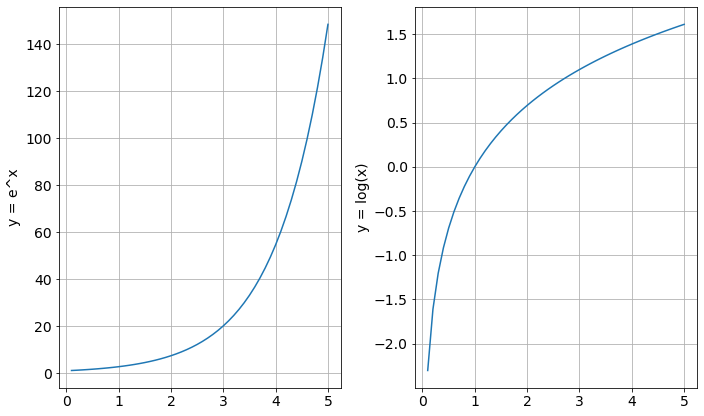

In [ ]:
x = np.linspace(.1, 5, 50)

# Создание и переход на зону отображения 1
plt.subplot(121)
plt.plot(x, np.exp(x))
plt.ylabel('y = e^x')
plt.grid(True)

# Создание и переход на зону отображения 2
plt.subplot(122)
plt.plot(x, np.log(x))
plt.ylabel('y = log(x)')
plt.grid(True)

# Коррекция размещения графиков
plt.tight_layout()

В данном примере проявляется две новые особенности работы с данным зонами:
- Для создания и переходов между зонами используется функция `plt.subplot()` с цифровой кодировкой;
- После добавления всех зон рекомендуется использовать функцию `plt.tight_layout()`, чтобы скорректировать размещение (проверьте, как отображается текст без использования данной функции).

Цифровая кодировка для зон отображения задается следующий образом:
- Первая цифра - количество рядов зон отображения (по ветрикали);
- Вторая цифра - количество колонок зон отображения (по горизонтали);
- Третья цифра - номер (начиная с 1) зоны, на которую происходит переход.

> Другим способом задания размеров и номера является использование аргументов: `plt.subplot(nrows=1, ncols=2, index=1)`

Номер зоны соответствует проходу сначала по колонкам первого ряда, затем переход на следующий ряд и проход по колонкам этого ряда.

> Важно обратить внимание, что при переходе на зону отображения все рисование происходит на ней (через объект `plt`). То есть, после перехода на зону $122$ можно вернуться на $121$ и снова рисовать на ней. 

### Задание

Нарисуйте сеткой $(2, 3)$ графики прямых с коэффициентами наклона от 2 до 7 включительно.

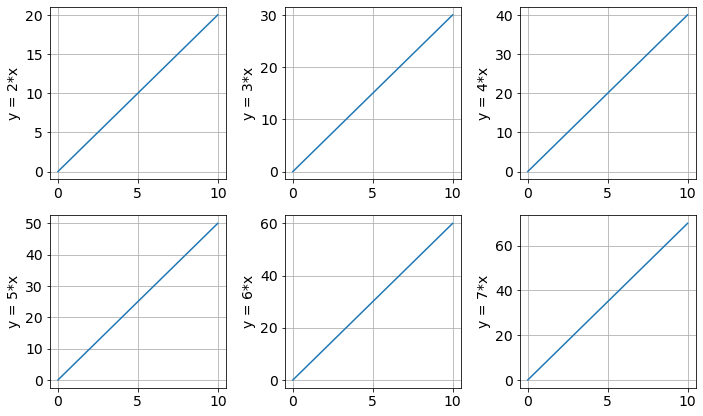

In [ ]:
x = np.linspace(0, 10, 50)

# TODO - в цикле нарисовать графики прямых с разными углами наклона
cell = 231
for i in range(2,8):
  plt.subplot(cell)
  plt.plot(x, i*x)
  plt.ylabel(f'y = {i}*x')
  plt.grid(True) 
  cell += 1

plt.tight_layout()

## Управление размером графика

Мы уже столкнулись с системой, когда мы задаем индекс зоны рисования с помощью `plt.subplot()` и все дальнейшие вызовы `plt.*()` производят операции на этой зоне (кроме `plt.show()` и другие общих функций). А вы знали, что перед тем, как рисовать, надо создать область для рисования? Именно ее делили на зоны отображения с помощью `plt.subplot()` или рисовали на всю область.

Суть в том, что при вызове функций рисования для нас создается область автоматически, а можно ее создать явно функцией `plt.figure()`.

Чем это полезно? Для всех графиков мы задаем размер областей в настройке в начале файла: `mpl.rcParams['figure.figsize'] = (10, 6)`. Но если мы хотим сделать график больше/меньше, то перед рисованием мы можем задать область со своим размером:

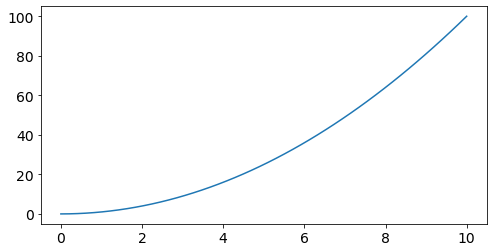

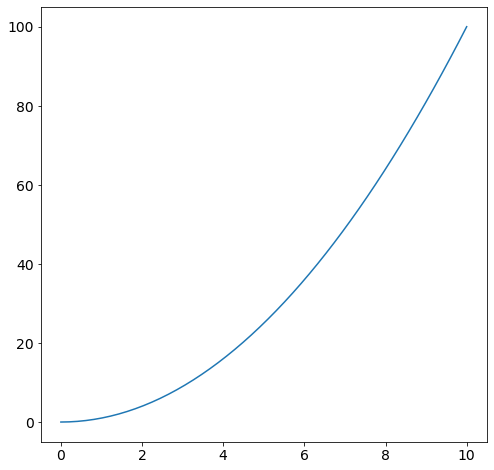

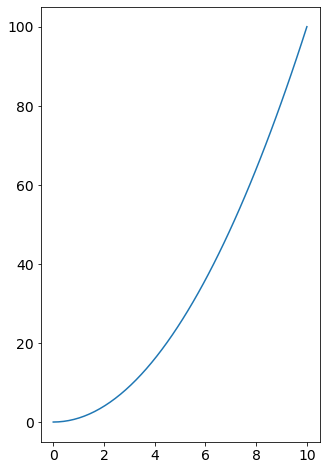

In [ ]:
x = np.linspace(0, 10, 50)

# Размер также задается в дюймах
plt.figure(figsize=(8, 4))
plt.plot(x, x**2)

plt.figure(figsize=(8, 8))
plt.plot(x, x**2)

plt.figure(figsize=(5, 8))
plt.plot(x, x**2)

Видите, вызвав функцию три раза, создалось три области рисования. Использовать для отображения нескольких графиков такой подход не удобно, мы просто убедились, что вызовом `plt.figure()` с аргументом `figsize` мы управляем размером зоны.

Поэтому, если вам необходимо переопределить размер графика по-умолчанию для конкретного случая - создайте явно область рисования со своими параметрами.

> У `plt.figure()` есть много других возможностей. Одна из них, например, аналогично `plt.subplot()` - задание индекса. Можно задать индекс области рисования и затем возвращаться на нее. Такой функционал в ноутбуках используется крайне редко, но понимать, что такие возможности есть - полезно.

### Задание

Нарисуйте графики функций `np.log1p()` и `np.log()` в диапазоне $[0.1, 10]$. Задайте размер области отображения: $(15, 9)$.

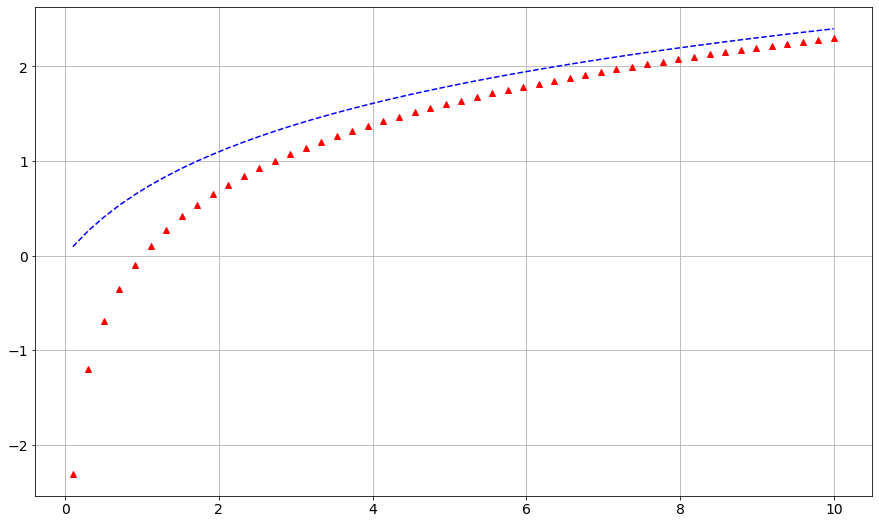

In [ ]:
# TODO
x = np.linspace(.1, 10, 50)

plt.figure(figsize=(15, 9))
plt.plot(x, np.log1p(x), 'b--')
plt.plot(x, np.log(x), 'r^')
plt.grid(True)

plt.show()

## Другой способ управления зонами отображения

Альтернативным способом управления зонами является создание массива зон. После того, как массив создан, каждый элемент массива используется для рисования в конкретной ячейке.

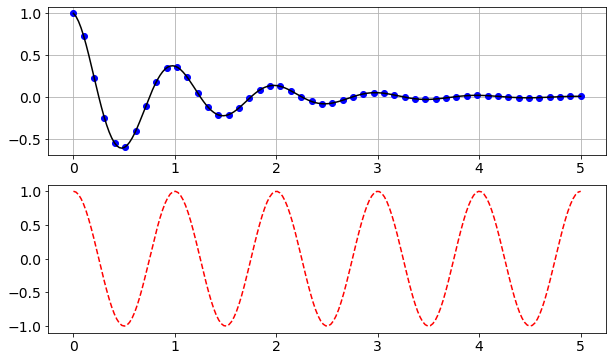

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

x1 = np.linspace(0, 5, 50)
x2 = np.linspace(0, 5, 200)

# Создаем массив с зонами
# (*) squeeze - при установке этого флага и nrows=1 или ncols=1 - 
#       ось будет убрана и на выходе будет 1D массив вместо 2D
# Возвращает:
#   fig - объект Figure, для подробностей обратитесь к документации
#   ax - массив объектов зон для рисования в сетке
fig, ax = plt.subplots(nrows=2, ncols=1, squeeze=False)

ax[0,0].plot(x1, f(x1), 'bo') 
ax[0,0].plot(x2, f(x2), 'k')
ax[0,0].grid(True)

ax[1,0].plot(x2, np.cos(2*np.pi*x2), 'r--')

plt.show()

## Отображение текста

Для отображения текста используется функция `plt.text()`:

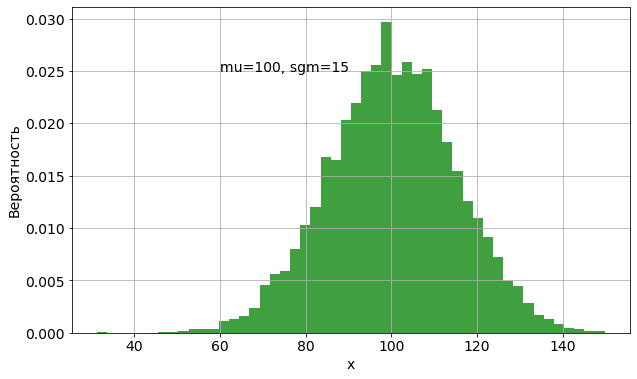

In [ ]:
# Создание данных для отображения распределения
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Отображение гистограммы
# bins - количество колонок
# density - суммарная плотность (нормализация к единичной суммы)
# color - цвет отображения
# alpha - немного прозрачности для визуализации
n, bins, patches = plt.hist(x, bins=50, density=1, color='g', alpha=0.75)

plt.xlabel('x')
plt.ylabel('Вероятность')
# Отображение текста
# x, y - координаты расположения нижней левой точки текста
# s - текст отображения
plt.text(x=60, y=.025, s='mu=100, sgm=15')
plt.grid(True)
plt.show()

Для отображения стрелки с аннотацией используется функция `plt.annotate()`

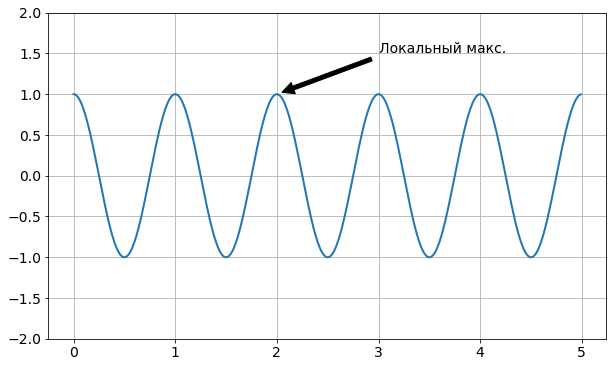

In [11]:
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(2*np.pi*x)
plt.plot(x, y, lw=2)

# Аннотация со стрелкой
# xy - кортеж положения конца стрелки по координатам
# xytext - кортеж положения текста по координатам
# arrowprops - словарь со свойствами описания стрелки
plt.annotate(
    'Локальный макс.', 
    xy=(2, 1), 
    xytext=(3, 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# Задаем предел отображения по оси Y
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

### Задание

Отобразите функцию параболы $y=k-x^2$ в диапазоне $x$ $[-3; 3]$ и подпишите точку экстремума для $k = [-1, 0, 1]$. Необходимо нарисовать все три графика с подписями с помощью зон отображения.

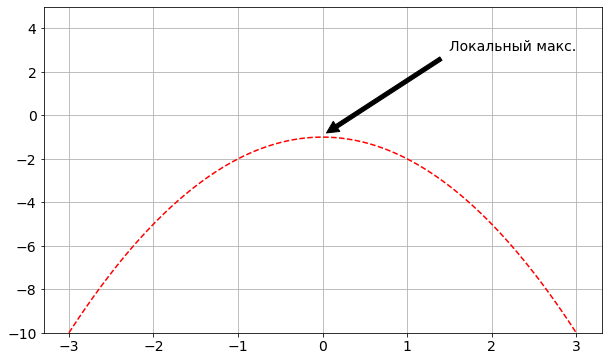

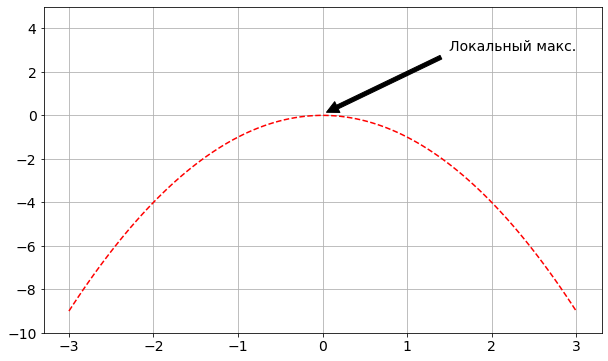

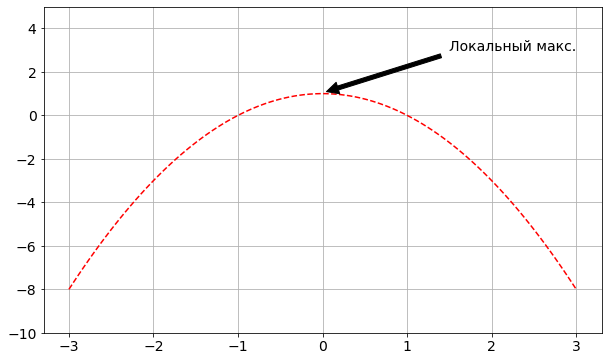

In [28]:
x = np.linspace(-3, 3, 100)
for k in range(-1, 2):
  y = k-x**2
  extr = np.max(y)
  index = np.argmax(y)
  x_max = x[index]
  plt.figure()
  plt.plot(x, y, 'r--')
  plt.grid(True)
  plt.ylim(-10, 5)
  plt.annotate(
    'Локальный макс.', 
    xy=(x_max, extr), 
    xytext=(1.5, 3),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )
plt.show()   

## Отображение в логарифмическом масштабе

Для отображения в логарифмическом масштабе используются функции `plt.yscale()`/`plt.xscale()`:

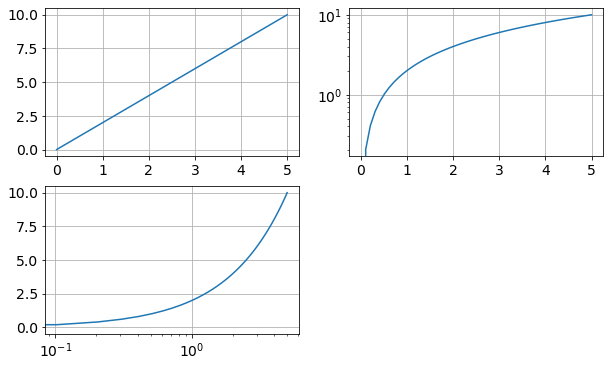

In [29]:
x = np.linspace(0, 5, 50)
y = x*2

plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.grid(True)

plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.grid(True)

plt.subplot(223)
plt.plot(x, y)
plt.xscale('log')
plt.grid(True)

# Задачки



Отобразите две функции на одном графике:
- $y = sin(x)$ толщиной 2, красным цветом пунктиром;
- $y = cos(x)+1$ толщиной 1, синим цветом крестиками;

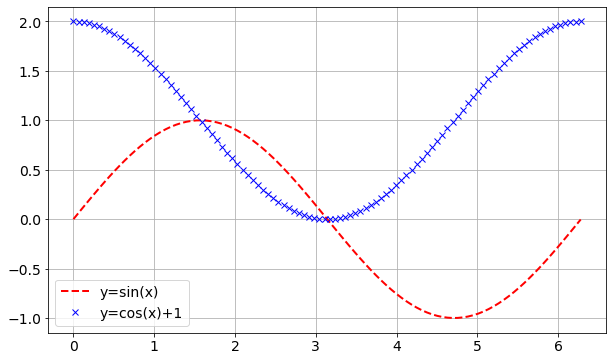

In [31]:
# TODO
x = np.linspace(0, 6.28, 100)
plt.plot(x, np.sin(x), 'r--', linewidth=2, label='y=sin(x)')
plt.plot(x, np.cos(x)+1, 'bx', linewidth=1, label='y=cos(x)+1')
plt.grid(True)
plt.legend()
plt.show()

Отобразите график, чтобы точки данных были синими с радиусом 3, при этом точки должны быть соединены зелеными пунктирными линиями:

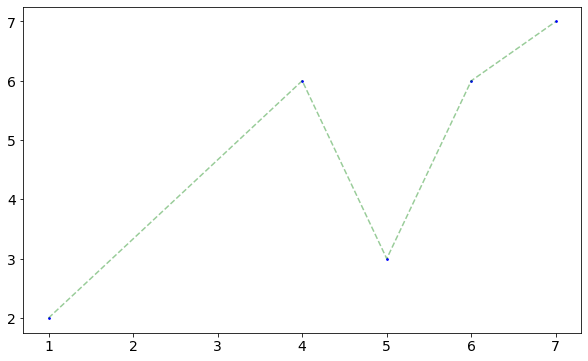

In [36]:
x = np.array([1, 4, 5, 6, 7])
y = np.array([2, 6, 3, 6, 7])

# TODO
plt.scatter(x, y, s=3, c='blue')
plt.plot(x, y, 'g--', alpha=0.4)

Нарисуйте данные графиками колонок (bar chart) на двух разных зонах отображения для каждой группы:

<BarContainer object of 5 artists>

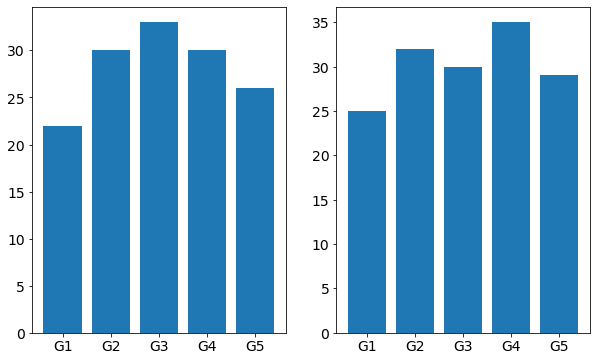

In [37]:
group1_scores = (22, 30, 33, 30, 26)
group2_scores = (25, 32, 30, 35, 29)
x_labels = ['G1', 'G2', 'G3', 'G4', 'G5']

# TODO
plt.subplot(121)
plt.bar(x_labels, group1_scores)
plt.subplot(122)
plt.bar(x_labels, group2_scores)

Отобразите средние значения для каждой группы со стандартными отклонениями:

<BarContainer object of 5 artists>

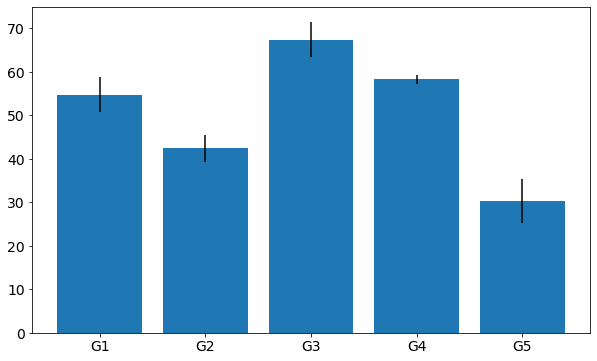

In [43]:
groups_means = (54.74, 42.35, 67.37, 58.24, 30.25)
groups_stds = (4, 3, 4, 1, 5)
x_labels = ['G1', 'G2', 'G3', 'G4', 'G5']

# TODO
plt.bar(x_labels, groups_means, yerr=groups_stds)

Отобразите данные точечным графиком, в котором цвет зависит от номера группы `groups`, а размер точки зависит от показателя площади `areas`.

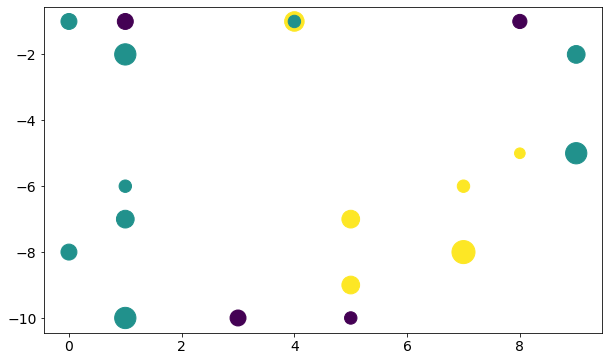

In [42]:
n_samples = 20
x = np.random.randint(0, 10, size=n_samples)
y = np.random.randint(-10, 0, size=n_samples)
areas = np.pi * np.random.randint(5, 15, size=n_samples)**2
groups = np.random.randint(0, 3, size=n_samples)

# TODO
plt.scatter(x, y, s=areas, c=groups)